In [9]:
from IPython.display import Image #for loading diagram images for the report

# Monte Carlo Simulation of 2D Ising Model Using Wolff Algorithm Block Updating Scheme

DAI Shi Yang Alris (1155179724)

### Table of Contents
 1. Abstract
 2. Theoretical Background
 3. Markov Chain Monte Carlo
 4. Wolff Algorithm
 5. Locating Critical Temperature
 6. Simulation details

    6.1 Finding Total Energy as a Function of Simulation Steps
    
    6.2 Finding Transition Temperature
 7. Result and Analysis
 8. References

## 1. Abstract
This report outlines a Monte Carlo Simulation of the 2D Ising Model via Wolff Algorithm. A 2D lattice structure of spins with random configuration is generated, and
the total energy of a system at a particular temperature is found via the Wolff Algorithm block updating scheme. Furthermore, The possible Curie temperature has also been found via calculating the specific heat capacity of the system at a particular temperature.

## 2. Theoretical Background
Ising model is a statistical mechanics model which is given by the Hamiltonian below:
 $$ H(\sigma) = -\sum \limits_{i,j} J_{ij} \sigma_{i} \sigma_{j} - \mu \sum \limits _{j} h_{j} \sigma_{j}$$

Where $i$ and $j$ are nearest neighbours, $J_{ij}$ are the interaction coefficient, $\mu$ is the magnetic moment and $h_{j}$ is the external magnetic field which is interacting with the system. $\sigma_{i}$ represents the spin value of neighbour $i$, where $\sigma_{i}  \in \{-1 , 1\}$.

For a system in thermal equilibrum, the probability that a system is in a particular configuration $c$ with total energy $H_{c}(\sigma)$ is:
$$ P[c] = \frac{e^{-\beta H_{c}(\sigma)}}{Z}$$
where $Z = \sum \limits_{c} e^{-\beta H_{c}(\sigma)}$ is the partition function, and $\beta = \frac{1}{temperature}$.


Traditionally, it is difficult to simulate phase transitions. The phase transition of interes is the transitions from a disordered system at a high temperature to a ordered system at low temperature, more commonly known as the magnetisation phase transition. To locate the critical temperature (Curie point), a common method would be to locate the point of discontinuity in a specific heat-beta graph. The Curie temperature is located at the discontinuity in the specific heat-beta graph, which is shown below.

In [3]:
Image(url="../ising/report_pngs/theo_phase_trans.png", width=300, height=300) 

## 3. Markov Chain Monte Carlo
For a system with N sites, the number of configurations of spins would be $2^N$. It is impossible to calculate the partition function via simple random sampling Monte Carlo method. However, by setting up a Markov chain with a stationary distribution which resembles $e^{-\beta H_{c}}$, one can numerically obtain the energy of a system at a particular temperature. This process is called Markov Chain Monte Carlo.

Since Markov Chain is a memoryless process and we wish to reach to a stationary distribution, the detailed balance condition must be satisfied for the ising model. 
$$\frac{W[c \longrightarrow c']}{W[c' \longrightarrow c]} = \frac{P[c']}{P[c]}  = \frac{e^{-\beta H_{c'}}}{e^{-\beta H_{c}}}$$

## 4. Wolff Algorithm
Any algorithm which satisfies the above condition will allow it to obtain the total energy of a 2D lattice structure from the ising model. The most commonly implemented algorithm is the Metropolis Algorithm. However, it is a local updating algorithm which flips spins one by one in a every markov chain monte carlo process, therefore requiring many markov steps see significant changes to the system's total energy, suggesting that the autocorrelation time of the Metropolis algorithm is large. 

Wolff Algorithm is a cluster algorithm which satisfies the detailed balance condition and also significantly decrease the autocorrelation time by selecting a random seed site and adds the indiviudal neighbours of the same spin into its cluster with a probability of $p = 1 - e^{-2\beta J}$ until all neighbours are visited and flip the entire cluster. This is a single step within the markov chain, and it is trivial to understand that the total energy can be found with less simulation steps. 

In [28]:
Image(url="../ising/report_pngs/wolff_cluster.png", width=300, height=300) 


Let state c be the state before the cluster flips, and c' be the state after the cluster flips. The probability to transition from state c to c' is represented by $W[c \longrightarrow c']$ and the probability to transition from stae c' to c is representated by $W[c' \longrightarrow c]$. Suppose the probability to not add a spin to a cluster is $(1-P_{add})$.

The cluster flip probability is given by the following expression:
$$\frac{W[c \longrightarrow c']}{W[c' \longrightarrow c]} = (1-P_{add})^{m' - m} = \frac{e^{\beta H_{c'}}}{e^{\beta H_{c}}}$$
Where $m'$ is the number of spins which are not in the cluster but have the same alignment in state c, and $m$ is the number of spoints which are not in the cluster but have the same alignment in state c'.

By multiplying both sides of the equation by the ratio of the acceptance probability $\frac{A[c \longrightarrow c']}{A[c' \longrightarrow c]}$, the markov chain expression can be written in terms of the energy difference between state c' and c.

$$\frac{W[c \longrightarrow c']}{W[c' \longrightarrow c]} \frac{A[c \longrightarrow c']}{A[c' \longrightarrow c]} = (1-P_{add})^{m' - m} \frac{A[c \longrightarrow c']}{A[c' \longrightarrow c]} = e^{-\beta (H_{c'} - H_{c})}$$

Since $(H_{c'} - H_{c}) = 2J(m - m')$, the acceptance ratio becomes the following:
$$\frac{A[c \longrightarrow c']}{A[c' \longrightarrow c]} = [(1-P_{add})e^{2\beta J}]^{m-m'}$$

In order for the detailed balance condition to hold, whereby $A[c \longrightarrow c'] = A[c' \longrightarrow c] = 1$, $P_{add} = 1- e^{2\beta J}$.


The pseudocode below outlines the Wolff Algorithm.

In [5]:
Image(url="../ising/report_pngs/wolff_flow.png", width=600, height=600) 

## 5. Locating Critical Temperature
Since the energy is computed numerically, there will not be a discontinuity near the critical temperature. There will be a finite size scaling behaviour for the specific heat of the 2D ising model in a $L \times L$ lattice. The critical temperature is shown as $\beta_c$ in the figure below. The curve is computed from exact solutions.

Heat capacity is calculated using the following formula:
$$C_{V} = \frac{Var(H(\sigma))\beta^2}{k_{B}}$$

In [8]:
Image(url="../ising/report_pngs/finite_size.png", width=400, height=300) 

## 6. Simulation details
To reduce computational resources, a simplified Ising model is adapted. Since our final interest is the critial temperature, external magnetic field is not of interest, therefore the hamiltonian of the 2D ising model system reduces to the following expression:
$$ H(\sigma) = -\sum \limits_{i,j} J_{ij} \sigma_{i} \sigma_{j}$$
In order to run the programme, the following packages were used:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from scipy.ndimage import convolve , generate_binary_structure

### 6.1 Total Energy as a function of simulation steps

To initialise the system, the input parameters are as follows:

In [16]:
N = 32
beta = 0.43
J = 1
p1 = 1 - np.exp(-2 * beta * J )

Where `N` is the lattice size, `beta` is the inverse temperature , and `J` is the interaction coefficient. The system of interest is ferromagnetic, therefore, for simplification, `J = 1`. The flip probability `p` from the detailed balance condition is then calculated.

To initialise the lattice, `N` is passed into the `fn_initial` function, which generates a NxN lattice and fills each site with either a spin up or down through a psuedo random number generator.

In `fn_initialise`, an array of size $N \times N$ with elements of a random distribution of numbers ranging from 0 to 1 is generated and stored in `initial_random_num_arr`. `initial_arr` is a $N \times N$ array of zeros. `initial_arr` is filled with $-1$ if the element is $>= 0.5$, and $1$ if the element is $< 0.5$. `initial_arr` is then returned.

In [45]:
def fn_initialise(N):
    initial_random_num_arr = np.random.random((N,N))
    initial_arr = np.zeros((N,N))
    initial_arr[initial_random_num_arr >= 0.5] = -1
    initial_arr[initial_random_num_arr < 0.5] = 1
    return initial_arr

To evaulate the total energy as a function of simulation steps, the total energy of the system is calculated through `fn_totalE`.

Since the lattice is filled with either -1 or 1, it can be represented as a binary structure, where each element is either `True` or `False`. Since the Hamiltonian is described by the multiplication of closest neighbours and is summed for all sites in the lattice, it can be represented by boolean operations. In `fn_totalE`, using Scipy package `generate_binary_structure`, a $3 \times 3$ array is stored in `kernel`.

```
kernel = array([[False,  True, False],
                    [ True,  True,  True],
                    [False,  True, False]], dtype=bool)
```

In [18]:
def fn_totalE(arr):
    kernel = generate_binary_structure(2,1) #rank = 2 (2D lattice structure) , connectivity = 1 (only 4 nearest neighbours, diagonal atoms are not neighbours)
    array = -arr * convolve(arr , kernel , mode = 'constant',cval = 0)
    return array.sum() * J

After the lattice is initialised, the wolff algorithm is performed in the function `fn_wolff_alg`. The brief outline of the `fn_wolff_alg` is as follows:
1. A random site is selected to be the seed site in `fn_select_seed`

In `fn_select_seed`, two random values between 0 to N is drawn, and is placed into `rand_x` and `rand_y`. `initial_spin_value` is retrieved from lattice array `arr`, and it is flipped, and stored back at the lattice cell at (`rand_x`,`rand_y`).

In [19]:
def fn_select_seed(arr):
    rand_x = int(np.random.randint(0,N))
    rand_y = int(np.random.randint(0,N))
    initial_spin_value = arr[rand_y][rand_x]
    flipped_spin_value = initial_spin_value * (-1)
    arr[rand_y][rand_x] = flipped_spin_value
    return initial_spin_value , arr , rand_x , rand_y

2. A neighbour list of the seed site which contains the coordinates of the neighbours and the spin of the neighbours is retrieved through `fn_neighbour_list` and stored in `first_neighbour_arr`.

In `fn_neighbour_list`, the top, right, bottom and left neighbours of the input latttice site coordinates and its spin value is placed into `neighbour_arr`.

In [20]:
def fn_neighbour_list(arr, x, y):
    neighbour_arr = []

    if(y > 0): #above
        neighbour_arr.append([x , y - 1 , arr[y - 1][x]])
    if(x > 0): #right
        neighbour_arr.append([x - 1 , y , arr[y][x - 1]])
    if (y < N-1 ): #down
        neighbour_arr.append([x , y + 1 , arr[y + 1][x]])
    if (x < N-1 ): #left
        neighbour_arr.append([x + 1 , y , arr[y][x + 1]])
    return neighbour_arr


3. Loop through the `first_neighbour_arr` and retrieve the neighbours of 1 of the first neighbours in every iteration of the `first_neighbour_arr` loop.
4. In `fn_traverse`, check if the neighbour is of the same spin as the seed site in `fn_flip`.
5. `fn_flip` evaulates the `flip_probability` and determines if it flips the spin. This is the same as adding the site into a cluster. When a spin is flipped,its neighbours are retrieved from `fn_neighbour_list`. If the spin is not flipped, it will go back to the previous layer of neighbours and evaulate their `flip_probability`. This search algorithm is called depth first search algorithm.

In [11]:
Image(url="../ising/report_pngs/Depth-first-tree.png", width=500, height=300) 


 If the neighbour has the same spin, the flip probability is evaulated. If the `flip_probability < p`, then the neighbour spin is flipped. If `flip_probability > p`, or if the neighbour spin is not the same as the seed spin value, the search will continue with the next neighbour.


In [21]:
def fn_flip(arr,x, y, initial_spin_val,p):
    if (arr[y][x] == initial_spin_val):
        flip_probability = random.random()
        if(flip_probability < p):
            arr[y][x] = initial_spin_val * (-1)
            return True
        else:
            return False
    else:
        return False

In [22]:
def fn_traverse(arr , initial_spin_value, x , y, neigh_arr,p):
    if not fn_flip(arr,x,y , initial_spin_value,p):
        return
    
    for n in neigh_arr:   
        next_neigh_arr = fn_neighbour_list(arr , n[0],  n[1])
        fn_traverse(arr , initial_spin_value , n[0] , n[1] , next_neigh_arr,p)


6. After all of the neighbours have been flipped, the single step in the markov chain is complete.  `fn_wolff_alg` is looped for many iterations and in each iteration, the total energy or the iteration is calculated using `fn_totalE`.


In [23]:
def fn_wolff_alg(arr,p):
    initial_spin_value , arr , rand_x , rand_y = fn_select_seed(arr)

    first_neighbour_arr = fn_neighbour_list(arr,rand_x , rand_y)

    for n in first_neighbour_arr:
        next_neigh_arr = fn_neighbour_list(arr , int(n[0]),  int(n[1]))
        fn_traverse(arr , initial_spin_value , int(n[0]) , int(n[1]) , next_neigh_arr,p)

    return arr

This is the main body of the code. The `total_iteration_num` is the number of markov chain steps. The lattice is initialised by `fn_initialise`, and `initial_lattice_arr` stores the initial lattice configuration for comparison purposes. The `fn_wolff_alg` is looped and the total energy is calculated by `fn_totalE` in each iteration.

In [ ]:
total_iteration_num1 = 1500
iteration_arr = []
energy_arr1 = []
lattice_arr1 = fn_initialise(N)

lattice_arr_initial = lattice_arr1.copy()
for i in range(total_iteration_num1):
    lattice_arr1 = fn_wolff_alg(lattice_arr1,p1)
    iteration_arr.append(i)
    energy_arr1.append(fn_totalE(lattice_arr1)) 

7. The iteration number and the total energy of the iteration is stored into `iteration_arr` and `energy_arr`, and is plotted.

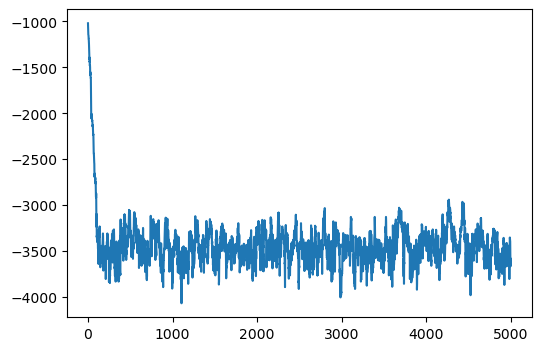

In [47]:
plt.figure(figsize=(6, 4))
plt.plot(iteration_arr, energy_arr1)

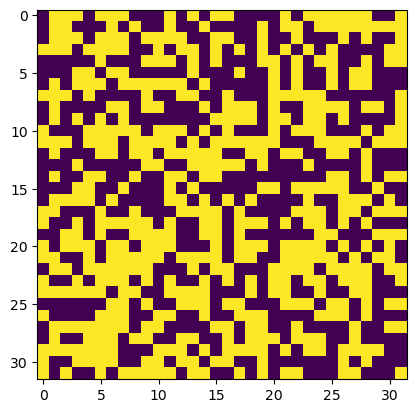

In [48]:
plt.imshow(lattice_arr_initial)

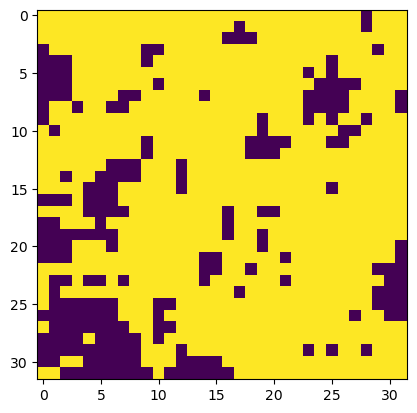

In [49]:
plt.imshow(lattice_arr1)

### 6.2 Finding Transition Temperature

To find the critical temperature, the heat capacity `heat_cap` as a function of inverse temperature `beta` should be plotted. The simulation in 6.1 finds the total energy of a particular inverse temperature. Therefore, to find `heat_cap` over a range of `beta`, the main body of the code should be modified.

To implement the heat capacity formula, $C_{V} = \frac{Var(H(\sigma))\beta^2}{k_{B}}$, $Var(H(\sigma))$ is obtained by the total energy ranging from the 1200th iteration step to the 3000th iteration step. This range is choosen because the total energy will reach a near stationary distribution after many simulation steps. Moreover, using a greater number of $(H(\sigma))$ values is more representative of the distribution of $H(\sigma)$.

In [51]:
beta_arr = [0.30,0.35,0.40,0.45,0.50,0.55,0.60]
heat_cap = []
total_iteration_num2 = 3000

for i in range(0,7):
    this_beta = beta_arr[i]
    p2 = 1 - np.exp(-2 * this_beta * J )
    energy_arr2 = []

    lattice_arr2 = fn_initialise(N)

    for j in range(total_iteration_num2):
        fn_wolff_alg(lattice_arr2,p2)
        if(j >= 1200):
            energy_arr2.append(fn_totalE(lattice_arr2)) 
    
    energy_std = np.std(energy_arr2)
    
    this_heat_cap = (energy_std * this_beta) * (energy_std * this_beta)/((1.38E-23))
    
    heat_cap.append(this_heat_cap) # calculate the energy std from the 1000th iteration and the 5000th iteration and multiply it with current beta


In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(beta_arr , heat_cap)

NameError: name 'plt' is not defined

## 7. Result and Analysis

From the figures showing total energy vs simulation step for different values of `beta`, it can be seen that the total energy of the system reaches to a stationary distribution after approximately 25 to 150 iterations. The iterations needed to reach to stationary total energy is dependent on `beta`. As `beta` value is increased, the number of iterations needed to reach stationary total energy decreases. One possible explaination for this is because `p` is larger when `beta` is larger, therefore, sites of the same value is more likely to join a cluster, so each iteration makes a bigger cluster.

In [19]:
Image(url="../ising/total_E_pngs/big_beta1.png", width=800, height=600) 

In [20]:
Image(url="../ising/total_E_pngs/big_beta2.png", width=800, height=600) 

In [21]:
Image(url="../ising/total_E_pngs/small_beta1.png", width=800, height=600) 

In [22]:
Image(url="../ising/total_E_pngs/small_beta2.png", width=800, height=600) 

In 6.2, the simulation ran for several different values of `beta`, and is plotted in the figure below. The maximum is located at `beta` = 0.45, which agrees with the figure from section 5. 

In [23]:
plt.figure(figsize=(6, 4))
plt.plot(beta_arr , heat_cap)

NameError: name 'plt' is not defined

## 7. References
- https://courses.physics.illinois.edu/phys498cmp/sp2022/Ising/IsingModel.html
- https://mattbierbaum.github.io/ising.js/
- https://csml.northwestern.edu/resources/Reprints/lnp_color.pdf
- https://hef.ru.nl/~tbudd/mct/lectures/cluster_algorithms.html
- http://latt.if.usp.br/technical-pages/twawesab/Text.html/node1.html
- https://arxiv.org/pdf/1404.0209
